# INTRODUCTION

## About
- Airbnb began in 2008 when 2 designers who had space to share hosted 3 travellers looking for a place to stay. Now, millions of Hosts and guests have created free Airbnb accounts to enjoy each other’s unique view of the world.
- Hosts share their places and there are millions of places to visit or book .

## Dataset 
- The listing dataset consists of all the necessary information about the host, place, review score, price of the place, and many more. In general, it has all the information related to the posting made by the host and reviews given by the renter .

## Probable Questions 
* Pricing Analysis .
   - How pricing varies across by property type and neighbourhood .
* Factors influencing prices .
   - Key features that drive price .
* Most Expensive neighbourhood .
* Relationship between cancellation policy and booking behaviour .
* Review Analysis .

# Data Cleaning 

## Importing Required Libraries

In [8]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Reading Dataser
df_calender=pd.read_csv("/Users/rachitlour/Data/Udacity/airbnb/calendar.csv")
df_listings=pd.read_csv("/Users/rachitlour/Data/Udacity/airbnb/listings.csv")
df_reviews=pd.read_csv("/Users/rachitlour/Data/Udacity/airbnb/reviews.csv")

In [10]:
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [12]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [14]:
len(df_listings)

3818

In [15]:
for column in df_listings: 
    no_of_null=df_listings[column].isnull().sum()
    print(f"{column}:Null values {no_of_null}")

id:Null values 0
listing_url:Null values 0
scrape_id:Null values 0
last_scraped:Null values 0
name:Null values 0
summary:Null values 177
space:Null values 569
description:Null values 0
experiences_offered:Null values 0
neighborhood_overview:Null values 1032
notes:Null values 1606
transit:Null values 934
thumbnail_url:Null values 320
medium_url:Null values 320
picture_url:Null values 0
xl_picture_url:Null values 320
host_id:Null values 0
host_url:Null values 0
host_name:Null values 2
host_since:Null values 2
host_location:Null values 8
host_about:Null values 859
host_response_time:Null values 523
host_response_rate:Null values 523
host_acceptance_rate:Null values 773
host_is_superhost:Null values 2
host_thumbnail_url:Null values 2
host_picture_url:Null values 2
host_neighbourhood:Null values 300
host_listings_count:Null values 2
host_total_listings_count:Null values 2
host_verifications:Null values 2
host_has_profile_pic:Null values 2
host_identity_verified:Null values 2
street:Null val

In [16]:
for column in df_listings: 
    null_percentage=df_listings[column].isnull().sum()/len(df_listings)*100
    print(f"{column}:percentage__null= {null_percentage}")

id:percentage__null= 0.0
listing_url:percentage__null= 0.0
scrape_id:percentage__null= 0.0
last_scraped:percentage__null= 0.0
name:percentage__null= 0.0
summary:percentage__null= 4.6359350445259295
space:percentage__null= 14.903090623363017
description:percentage__null= 0.0
experiences_offered:percentage__null= 0.0
neighborhood_overview:percentage__null= 27.029858564693555
notes:percentage__null= 42.063907805133574
transit:percentage__null= 24.463069669984286
thumbnail_url:percentage__null= 8.381351492928236
medium_url:percentage__null= 8.381351492928236
picture_url:percentage__null= 0.0
xl_picture_url:percentage__null= 8.381351492928236
host_id:percentage__null= 0.0
host_url:percentage__null= 0.0
host_name:percentage__null= 0.05238344683080147
host_since:percentage__null= 0.05238344683080147
host_location:percentage__null= 0.20953378732320588
host_about:percentage__null= 22.49869041382923
host_response_time:percentage__null= 13.698271346254584
host_response_rate:percentage__null= 13.6

In [17]:
column_null_morethan60=["license","square_feet","neighborhood_overview","notes","transit"]
df_listings_modified=df_listings.drop(columns=column_null_morethan60,axis=1)

In [18]:
df_listings.shape

(3818, 92)

In [19]:
df_listings_modified.shape

(3818, 87)

In [20]:
df_listings_modified.shape

(3818, 87)

In [21]:
duplicate_counts=df_listings_modified.duplicated().sum()

In [22]:
duplicate_counts

0

In [23]:
df_listings_modified.drop(columns=df_listings_modified.columns[df_listings_modified.columns.str.contains("url")],axis=1,inplace=True)

In [24]:
# Format the price columns
df_listings_modified.price=df_listings_modified.price.str.replace(r"$","").str.replace(",","").astype("float32")
df_listings_modified.weekly_price = df_listings_modified.weekly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
df_listings_modified.monthly_price = df_listings_modified.monthly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
df_listings_modified.security_deposit = df_listings_modified.security_deposit.str.replace(r"$", "").str.replace(",", "").astype("float32")
df_listings_modified.cleaning_fee = df_listings_modified.cleaning_fee.str.replace(r"$", "").str.replace(",", "").astype("float32")
df_listings_modified.extra_people = df_listings_modified.extra_people.str.replace(r"$","").str.replace(",","").astype("float32")

In [25]:
# Drop column with host_
df_listings_modified.drop(columns=df_listings_modified.columns[df_listings_modified.columns.str.contains("^host_")],inplace=True)

In [26]:
numerical_columns=df_listings_modified.select_dtypes(exclude=object).columns.tolist()
categorical_columns =df_listings_modified.select_dtypes(include=object).columns.to_list()

In [27]:
numeric_imputer=SimpleImputer(strategy="median")
df_listings_modified[numerical_columns]=numeric_imputer.fit_transform(df_listings_modified[numerical_columns])
# Categorical columns with mode imputation
categorical_imputer=SimpleImputer(strategy="most_frequent")
df_listings_modified[categorical_columns]=categorical_imputer.fit_transform(df_listings_modified[categorical_columns])

# EDA

## Database Description

In [30]:
df_listings_modified.describe()

,id,scrape_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,47.628961,-122.333103,3.349398,1.258381,1.307229,1.735202,127.976166,722.867994,...,22.223415,94.786799,9.699057,9.632268,9.823468,9.842064,9.676008,9.546359,2.946307,1.990416
std,2.962660e+06,0.000000e+00,0.043052,0.031745,1.977599,0.589369,0.882785,1.139393,90.250022,392.261900,...,37.730892,6.045120,0.649705,0.744855,0.547703,0.522425,0.591225,0.713340,5.893029,1.677888
min,3.335000e+03,2.016010e+13,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,20.000000,100.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,75.000000,620.000000,...,2.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.830000
50%,6.118244e+06,2.016010e+13,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,100.000000,650.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,150.000000,671.500000,...,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.660000
max,1.034016e+07,2.016010e+13,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,1000.000000,6300.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


## Price Distribustion ,Histogram Plot

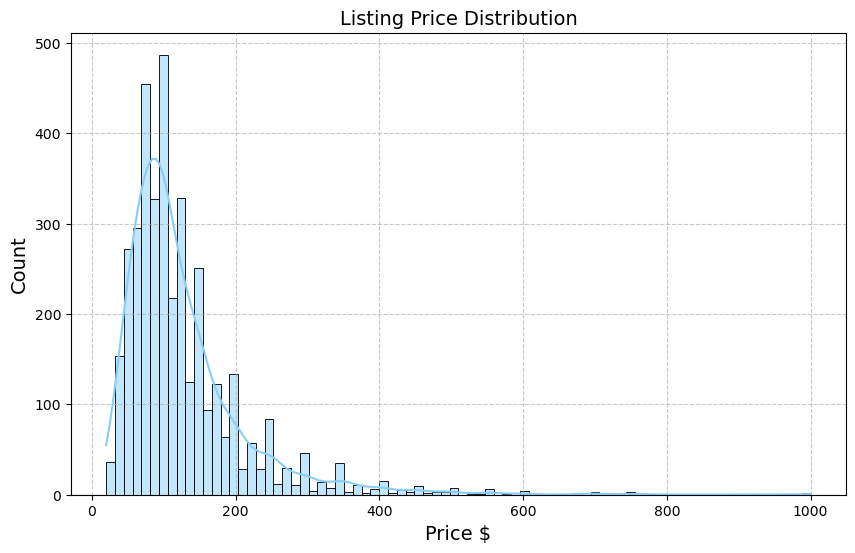

In [32]:
# Plotting the Listing Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df_listings_modified, x="price",color="#87CEFA",edgecolor='black',kde=True,bins=80)

#sns.kdeplot(data=df_listings_modified,x="price",color="red",stat="count",linewidth=1)
plt.title("Listing Price Distribution",fontsize=14)
plt.xlabel("Price $",fontsize=14)
plt.ylabel("Count",fontsize=14)

plt.grid(linestyle="--",alpha=0.7)
plt.show()


## Most expensive neighbourhoods in seattle

In [34]:
avg_price_by_neighbourhood_group=(df_listings_modified.groupby("neighbourhood_group_cleansed")["price"].mean().reset_index()
    .sort_values(by='price', ascending=False))

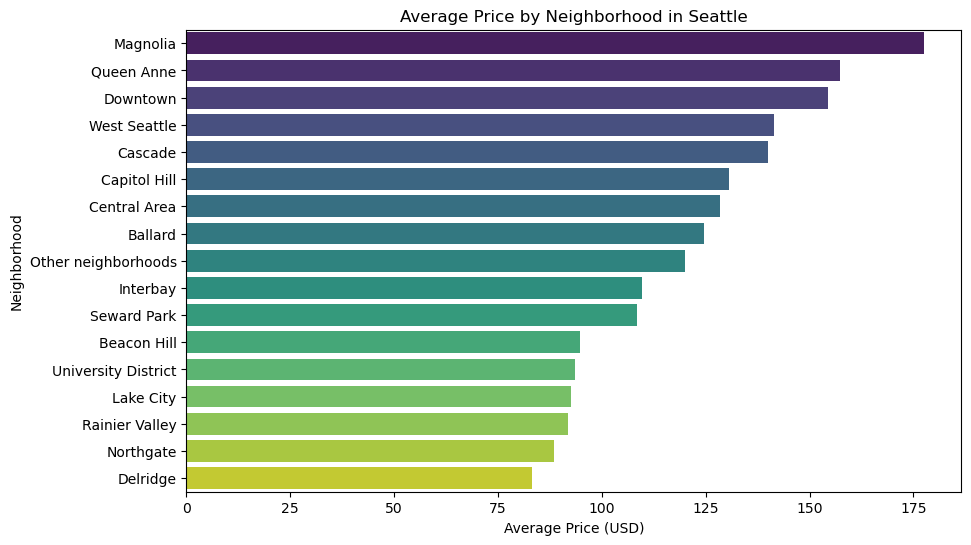

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x="price",y="neighbourhood_group_cleansed",data=avg_price_by_neighbourhood_group,palette="viridis")
plt.title('Average Price by Neighborhood in Seattle')
plt.xlabel('Average Price (USD)')
plt.ylabel('Neighborhood')
plt.show()

## Price Analysis

### How pricing varies by neighborhood.

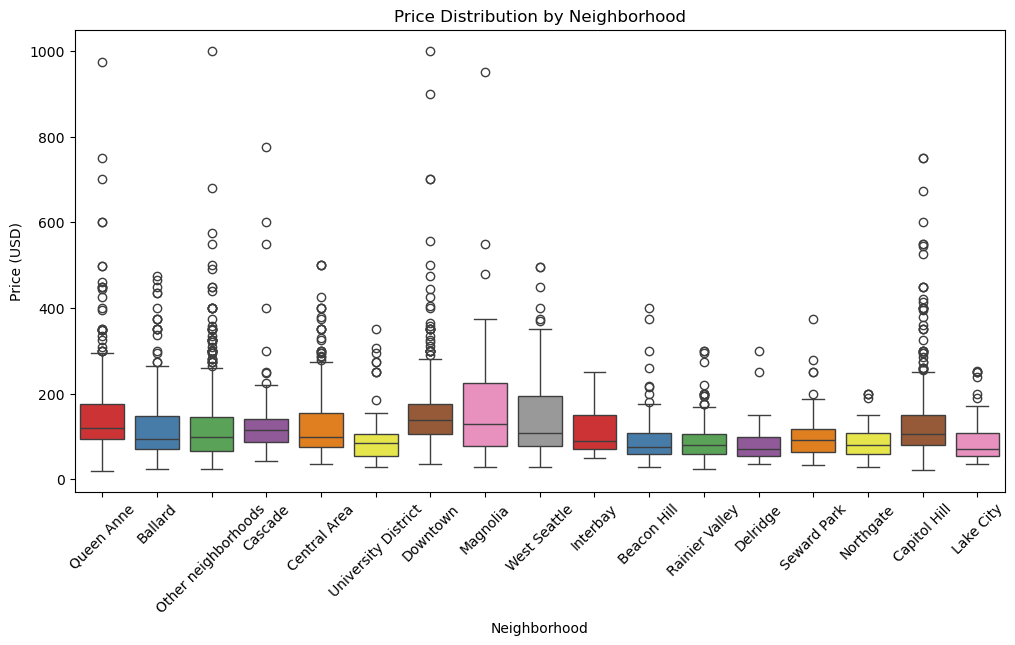

In [38]:
# Boxplot: Price by neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=df_listings_modified,palette="Set1")
plt.title('Price Distribution by Neighborhood')
plt.ylabel('Price (USD)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

### Average price by room type ,Boxplot

(0.0, 299.0)

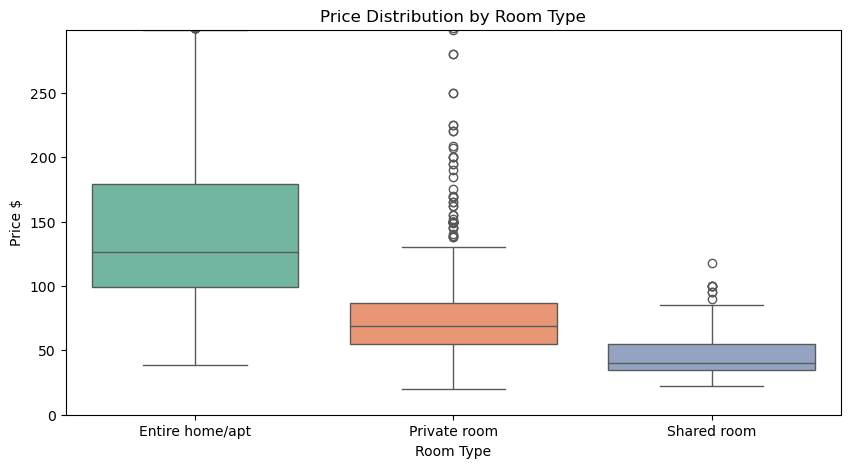

In [40]:
# Price distribution by Room Type 
plt.figure(figsize=(10,5))
sns.boxplot(df_listings_modified,x="room_type",y="price",hue="room_type",palette="Set2")
plt.xlabel("Room Type")
plt.ylabel("Price $")
plt.title("Price Distribution by Room Type")
plt.ylim(0, df_listings_modified['price'].quantile(0.95)) 

### Average price by room Type

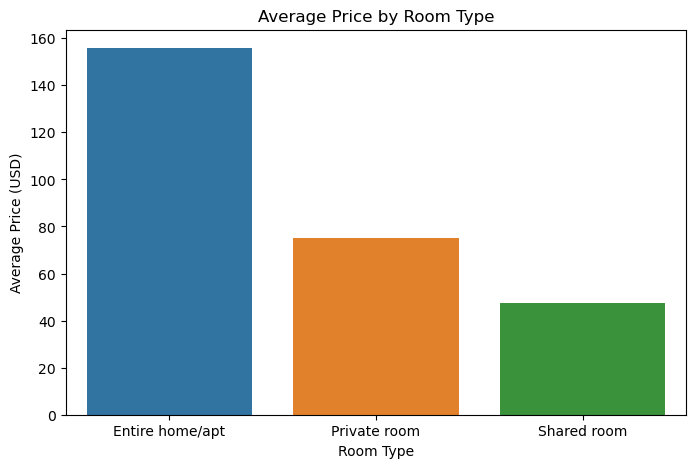

In [42]:
# Group by room type
avg_price_by_room = df_listings_modified.groupby('room_type')['price'].mean().reset_index()

# Bar chart: Average price by room type
plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='price', data=avg_price_by_room,hue="room_type")
plt.title('Average Price by Room Type')
plt.ylabel('Average Price (USD)')
plt.xlabel('Room Type')
plt.show()

## Distribution of Listings

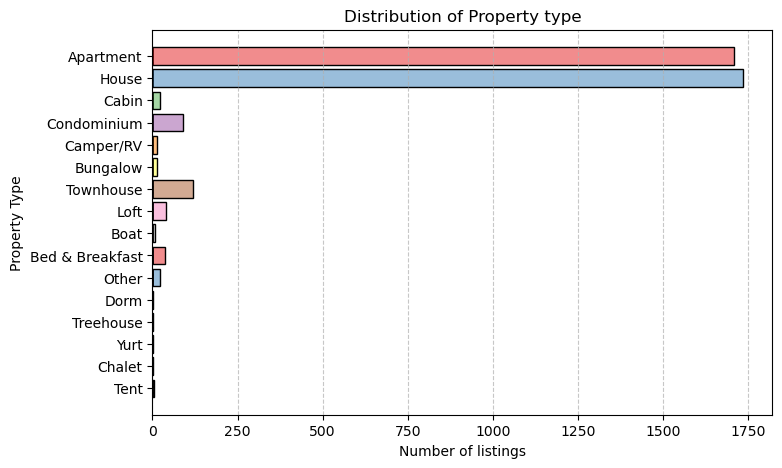

In [44]:
# Distribution of property type 
plt.figure(figsize=(8,5))
sns.histplot(df_listings_modified,y="property_type",palette="Set1",shrink=0.8,hue="property_type",legend=False)
plt.title("Distribution of Property type")
plt.xlabel("Number of listings")
plt.ylabel("Property Type")
plt.grid(axis="x",linestyle="--",alpha=0.7)
plt.show()

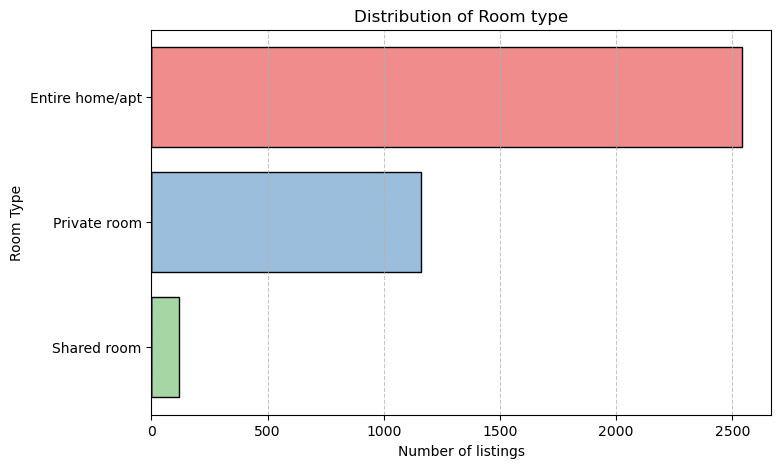

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df_listings_modified,y="room_type",palette="Set1",shrink=0.8,hue="room_type",legend=False)
plt.title("Distribution of Room type")
plt.xlabel("Number of listings")
plt.ylabel("Room Type")
plt.grid(axis="x",linestyle="--",alpha=0.7)
plt.show()

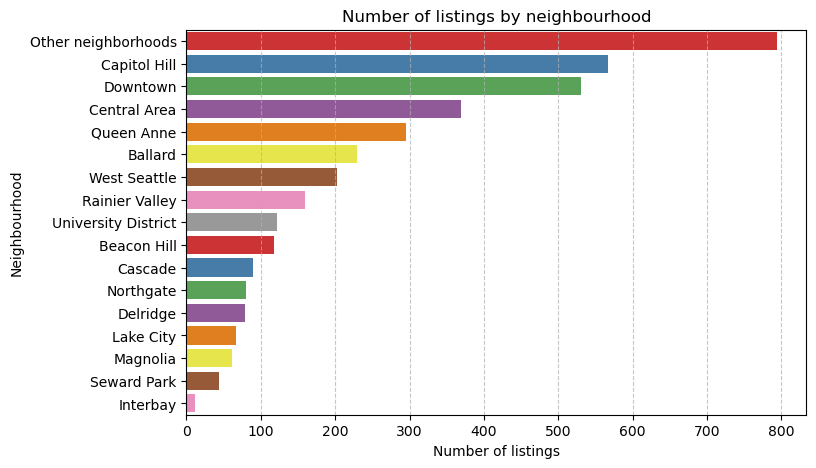

In [46]:
# Number of Listings by Neighborhood
plt.figure(figsize=(8,5))
sns.countplot(df_listings_modified,y="neighbourhood_group_cleansed",palette="Set1",legend=False,order=df_listings["neighbourhood_group_cleansed"].value_counts().index)
plt.title("Number of listings by neighbourhood")
plt.xlabel("Number of listings")
plt.ylabel("Neighbourhood")
plt.grid(axis="x",linestyle="--",alpha=0.7)
plt.show()

## Distribution as per reviews

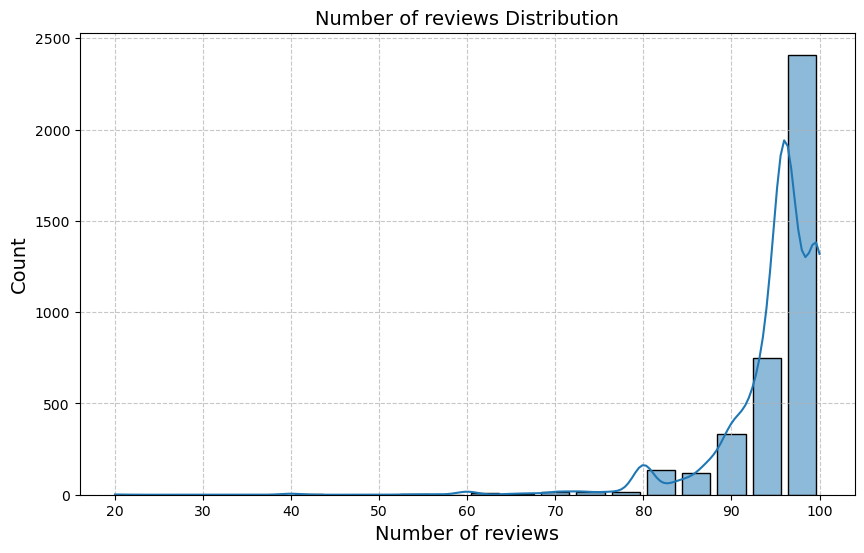

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_listings_modified, x="review_scores_rating",edgecolor='black',kde=True,shrink=0.8,bins=20,legend=False)

#sns.kdeplot(data=df_listings_modified,x="price",color="red",stat="count",linewidth=1)
plt.title("Number of reviews Distribution",fontsize=14)
plt.xlabel("Number of reviews",fontsize=14)
plt.ylabel("Count",fontsize=14)

plt.grid(linestyle="--",alpha=0.7)
plt.show()

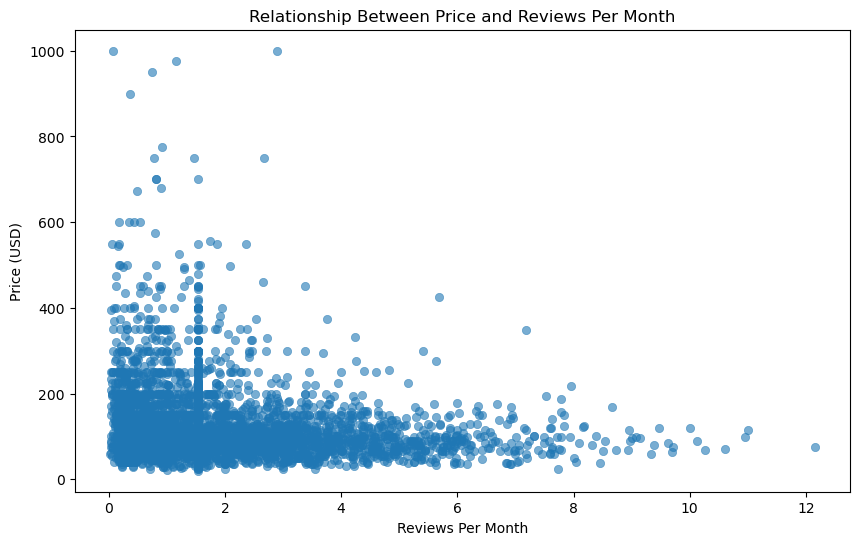

In [49]:
# Remove entries with missing or zero values for price and reviews_per_month
filtered_data = df_listings_modified[(df_listings_modified['price'] > 0) & (df_listings_modified['reviews_per_month'] > 0)]

# Scatter plot: Price vs. Reviews per month
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='reviews_per_month', 
    y='price', 
    data=filtered_data, 
    alpha=0.6, 
    edgecolor=None
)
plt.title('Relationship Between Price and Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Price (USD)')
plt.show()


## Distribution by cancellation policy

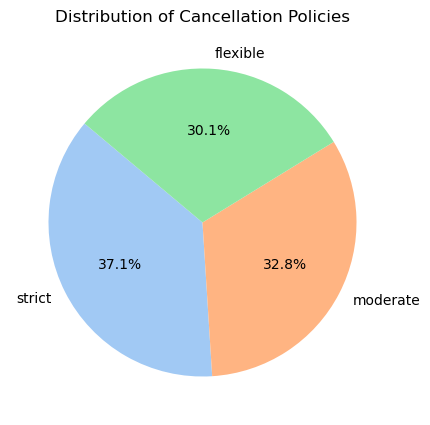

In [51]:
# Count bookings by cancellation policy
policy_counts = df_listings_modified['cancellation_policy'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
policy_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Cancellation Policies')
plt.ylabel('')  # Removes default ylabel
plt.show()

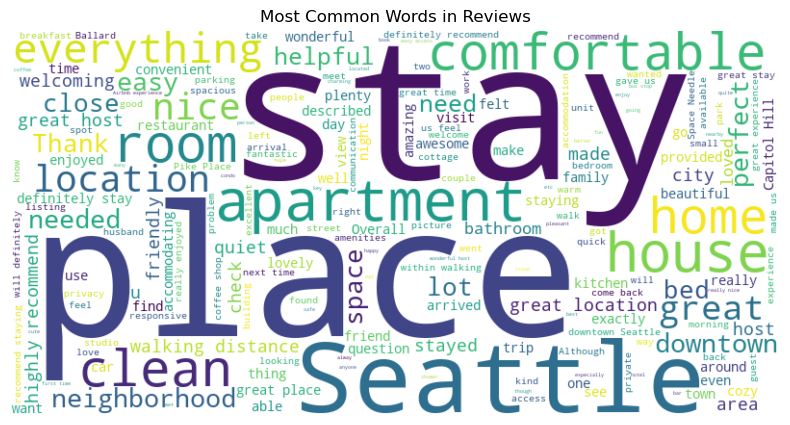

In [52]:
from wordcloud import WordCloud

# Concatenate all reviews into one string
all_reviews = " ".join(df_reviews['comments'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

## Reviews Sentiment plot

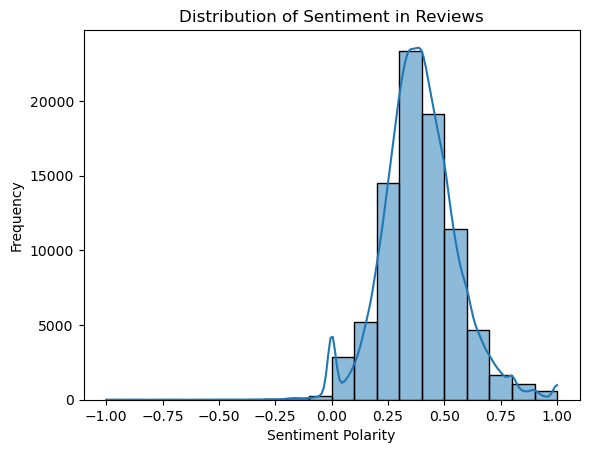

In [54]:
from textblob import TextBlob

df_reviews['sentiment'] = df_reviews['comments'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df_reviews['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment in Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Corelation

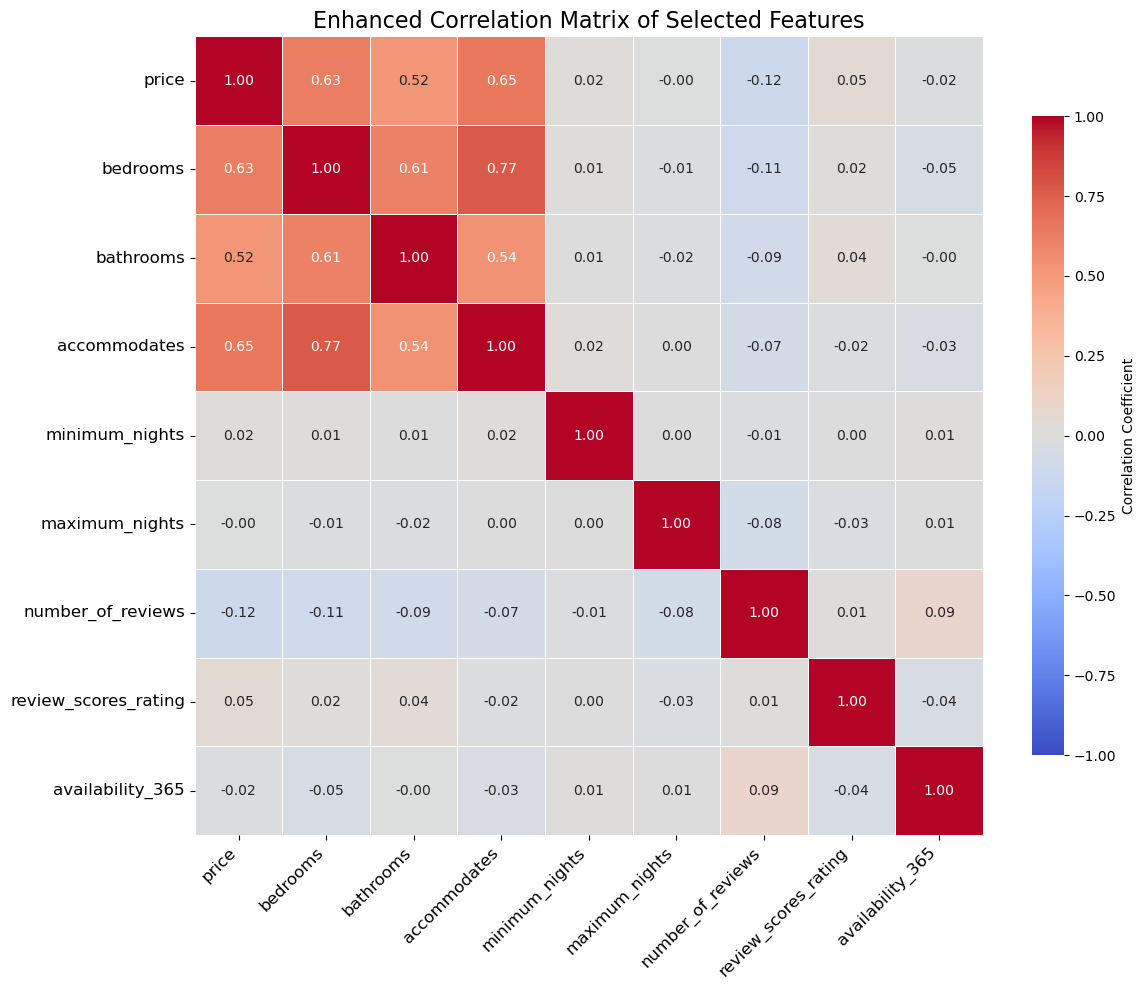

In [72]:
# Select relevant numerical columns for correlation analysis
column_to_coorelate = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]
# convert to numeric
for col in column_to_coorelate:
    df_listings_modified[col] = pd.to_numeric(df_listings_modified[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = df_listings_modified[column_to_coorelate].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})
plt.title('Enhanced Correlation Matrix of Selected Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

plt.show()